In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
num_samples = 200
age = np.random.randint(18, 65, size=num_samples)
income = np.random.randint(20000, 100000, size=num_samples)

In [ ]:
purchase = np.where((income > 50000) & (age > 30), 1, 0)

In [ ]:
df = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Purchase': purchase
})

In [ ]:
X = df[['Age', 'Income']]
y = df['Purchase']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.89      0.89      0.89        18

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



In [ ]:
y_pred_prob = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

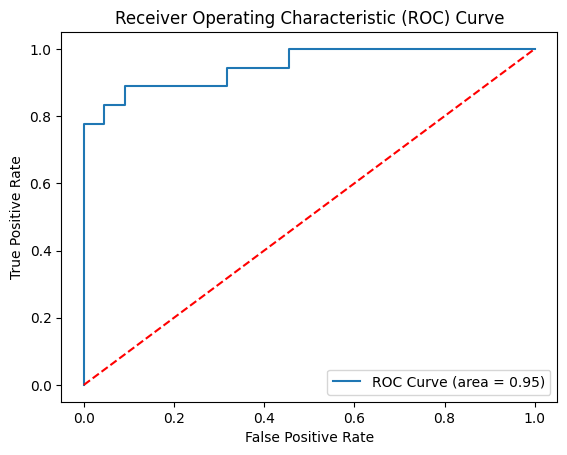

In [ ]:
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()